In [2]:
import pandas as pd

ads_dimension = pd.read_excel("Dataset.xlsx",sheet_name='ads dimension (dim table)',header=1)
mod_dim = pd.read_excel("Dataset.xlsx",sheet_name='moderator dimension (dim table)',header=0)

#test


In [3]:
ads_dimension.head()
# finding the number of null/blank values for all columns in ads_dimension
for col in ads_dimension.columns:
    if ads_dimension[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dimension[col].isna().sum()}')
    else:
        continue


 "queue_market" : 21155
 "punish_num" : 38286
 "ad_revenue" : 10771
 "start_time" : 6675


In [4]:
# to find the distribution of latest_punish_begin_date for blank punish_num rows
condition = ads_dimension['punish_num'].isna()
filtered_df = ads_dimension[condition]
filtered_df.head()

unique_countss = filtered_df['latest_punish_begin_date'].value_counts()
print(unique_countss)

# all latest_punish_begin_date = 2000-01-01 if punish_num is blank, so we replace the blank with a 0
ads_dimension['punish_num'].fillna(0, inplace=True)
unique_counts = ads_dimension['punish_num'].value_counts()
print(unique_counts)

2000-01-01    38286
Name: latest_punish_begin_date, dtype: int64
0.0     38286
1.0      2194
2.0       163
4.0        14
3.0        13
16.0        5
12.0        2
5.0         2
Name: punish_num, dtype: int64


In [5]:
# (insert explanation on why we drop queue market)
ads_dimension = ads_dimension.drop('queue_market', axis=1)
ads_dimension.head()

,p_date,ad_id,delivery_country,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation


In [6]:
# deleted all rows that are an exact duplicate(all columns same) of other rows.
len(ads_dimension)

duplicates = ads_dimension.duplicated().sum()
print(duplicates)

ads_dimension_no_duplicates = ads_dimension.drop_duplicates()
print(ads_dimension_no_duplicates)
len(ads_dimension_no_duplicates)

1115
         p_date             ad_id delivery_country  punish_num  \
0      20230807  1747578422390810               US         1.0   
1      20230807  1758543228094480               SA         1.0   
2      20230807  1738303151826990               AU         2.0   
3      20230807  1738303920938010               NZ         2.0   
4      20230807  1738304016410620               NZ         2.0   
...         ...               ...              ...         ...   
40673  20230807  1773517805189120               TR         0.0   
40674  20230807  1773472206047230               VN         0.0   
40675  20230807  1773607712030720               BR         0.0   
40676  20230807  1773589699308540               BE         0.0   
40678  20230807  1773608138524670               BR         0.0   

      latest_punish_begin_date  ad_revenue  avg_ad_revenue  \
0                   2023-07-24   5132.1700        4795.250   
1                   2023-06-14   1976.2500        1063.767   
2               

39564

In [7]:
for col in ads_dimension_no_duplicates.columns:
    if ads_dimension_no_duplicates[col].isna().sum() > 0:
        print(f' "{col}" : {ads_dimension_no_duplicates[col].isna().sum()}')
    else:
        continue

null_rows = ads_dimension_no_duplicates[ads_dimension_no_duplicates[['start_time', 'ad_revenue']].isnull().all(axis=1)]
len(null_rows)

 "ad_revenue" : 10495
 "start_time" : 6600


6600

## Moderator Dimension

In [8]:
# find number of null values in each column

for col in mod_dim.columns:
    if mod_dim[col].isna().sum() > 0:
        print(f' "{col}" : {mod_dim[col].isna().sum()}')
    else:
        continue

mod_dim.rename(columns={' accuracy ': 'accuracy'}, inplace=True)

# accuracy colum contains "-" values
non_numeric_values = mod_dim[pd.to_numeric(mod_dim["accuracy"], errors='coerce').isna()]
len(non_numeric_values)

print(non_numeric_values)

 "Productivity" : 129
 "Utilisation %" : 129
             moderator                                             market  \
0     1689841547143170  ["SA", "OM", "BH", "QA", "JO", "IQ", "KW", "EG...   
265   1694555598292994                                             ["NL"]   
412   1761892264652818                                             ["DE"]   
510            1005827                                             ["BR"]   
529            2796851                                             ["KZ"]   
892            3778633                                             ["TR"]   
916            5581253                                             ["DK"]   
943            9699751                                             ["ID"]   
1283           1822136                                       ["GB", "IE"]   
1331           3297271                                          ["OTHER"]   
1393  1695027913818113                                             ["IT"]   

      Productivity  Utilisatio

In [10]:
# remove rows that have null values for productivity and utilisation, and "-" values for accuracy
column_name = 'accuracy'
numeric_mask = pd.to_numeric(mod_dim[column_name], errors='coerce').notna()
cleaned_mod_dim = mod_dim[numeric_mask]

len(cleaned_mod_dim)

columns_to_check = ['Productivity', 'Utilisation %']

cleaned_mod_dim = cleaned_mod_dim.dropna(subset=columns_to_check, how='all')

len(cleaned_mod_dim)


1275

In [14]:
#EDA

# Get basic statistics of numeric columns
print(cleaned_mod_dim.describe())

# Check for missing values
print(cleaned_mod_dim.isnull().sum())

# Check data types of columns
print(cleaned_mod_dim.dtypes)


          moderator  Productivity  Utilisation %  handling time
count  1.275000e+03   1275.000000    1275.000000   1.275000e+03
mean   1.084096e+15    368.445545       0.725055   1.068949e+05
std    8.345996e+14    177.840831       0.195460   3.747668e+05
min    1.003316e+06      0.540000       0.000000   7.300000e+01
25%    7.064704e+06    249.239693       0.658732   6.276050e+04
50%    1.695291e+15    344.712500       0.779906   8.586800e+04
75%    1.736353e+15    462.375000       0.849611   1.016235e+05
max    1.774284e+15   1323.355000       1.287250   9.443621e+06
moderator        0
market           0
Productivity     0
Utilisation %    0
handling time    0
accuracy         0
dtype: int64
moderator          int64
market            object
Productivity     float64
Utilisation %    float64
handling time      int64
accuracy          object
dtype: object


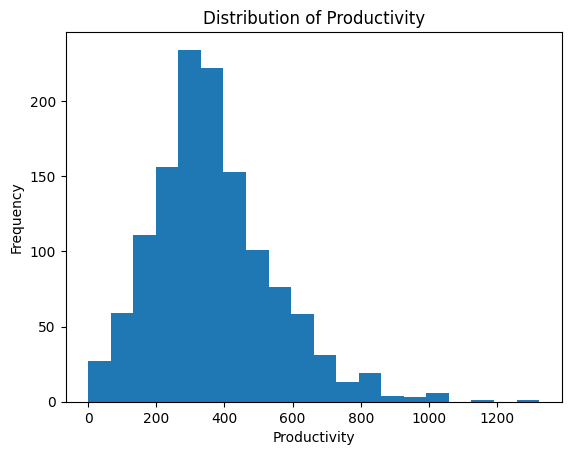

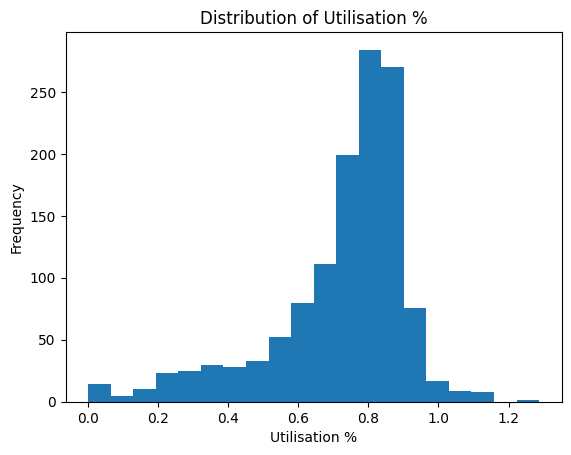

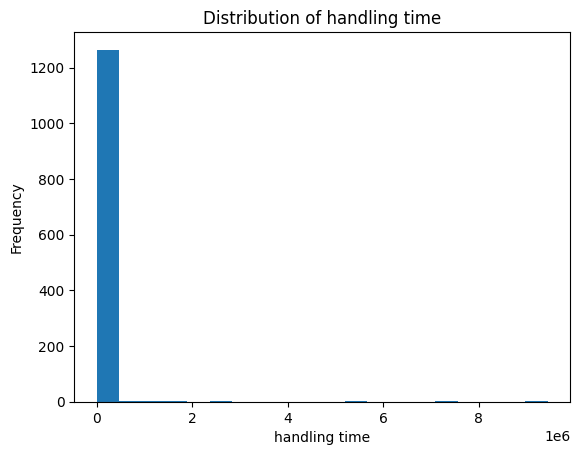

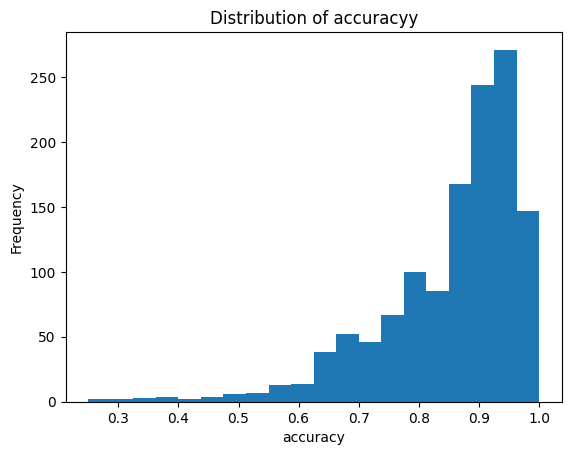

In [21]:
import matplotlib.pyplot as plt

# Histogram of 'Productivity'
plt.hist(cleaned_mod_dim['Productivity'], bins=20)
plt.xlabel('Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Productivity')
plt.show()

# Histogram of 'Utilisation %'
plt.hist(cleaned_mod_dim['Utilisation %'], bins=20)
plt.xlabel('Utilisation %')
plt.ylabel('Frequency')
plt.title('Distribution of Utilisation %')
plt.show()


# Histogram of 'handling time'
plt.hist(cleaned_mod_dim['handling time'], bins=20)
plt.xlabel('handling time')
plt.ylabel('Frequency')
plt.title('Distribution of handling time')
plt.show()


# Histogram of 'accuracy'
plt.hist(cleaned_mod_dim['accuracy'], bins=20)
plt.xlabel('accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of accuracyy')
plt.show()


C:\Users\fongj\AppData\Local\Temp\ipykernel_7648\3809648930.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_mod_dim.corr()


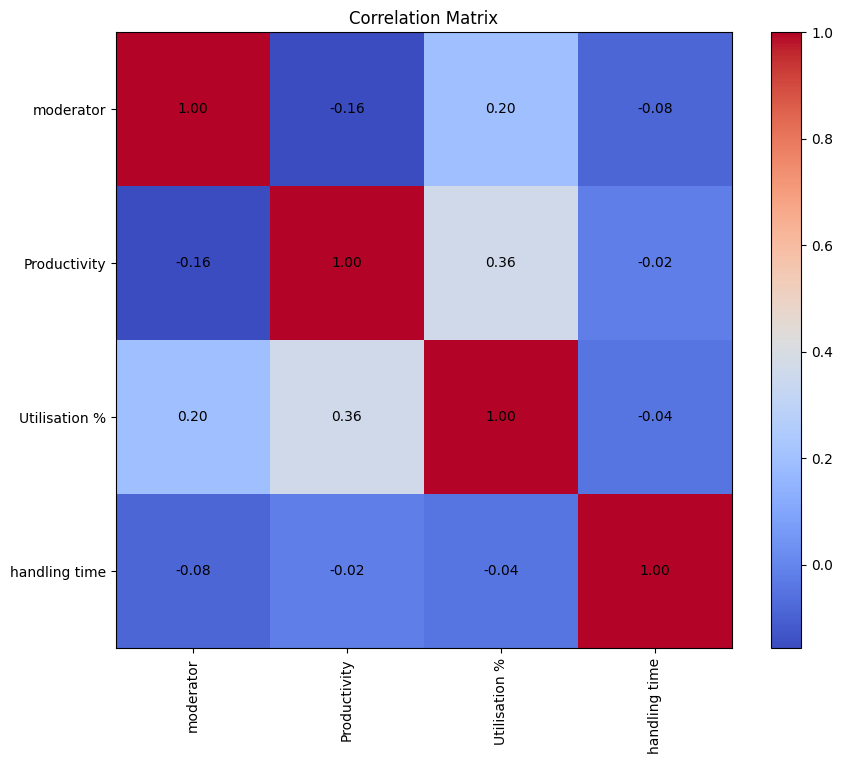

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = cleaned_mod_dim.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using imshow
im = ax.imshow(correlation_matrix, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(im)

# Set ticks and labels
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=90)
plt.yticks(tick_marks, correlation_matrix.columns)

# Add text annotations for each correlation coefficient
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"  # Format to two decimal places
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=10)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()
